In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/ASUS/Desktop/PROJECT/csv files/DSData-master/DSData-master/happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
data.columns.size

12

In [5]:
data.index

RangeIndex(start=0, stop=158, step=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
data1 = data.drop(['Country','Region','Happiness Rank'], axis=1)

In [8]:
data1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


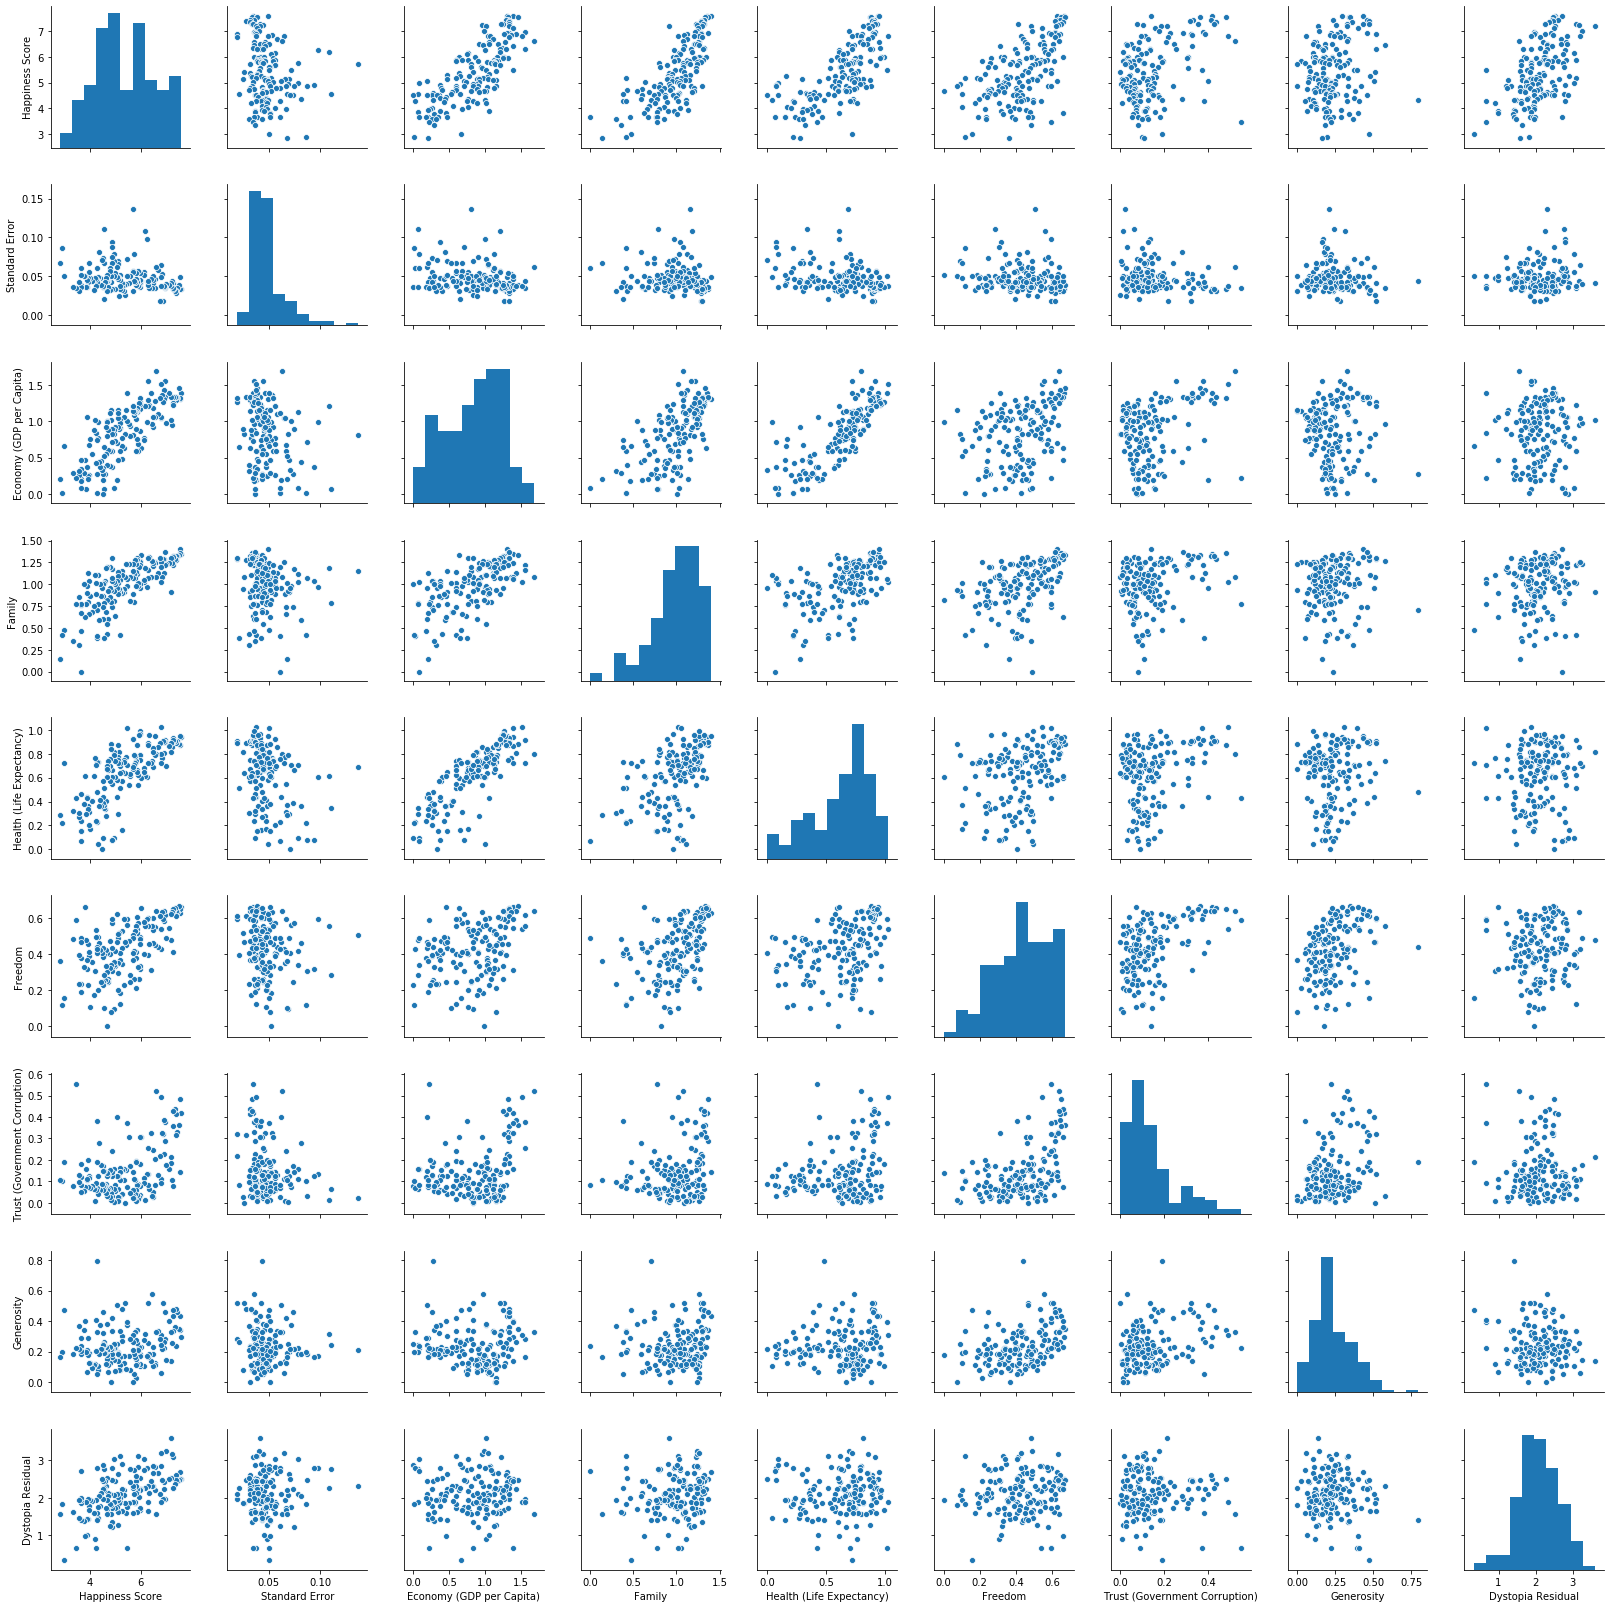

In [9]:
sns.pairplot(data1)

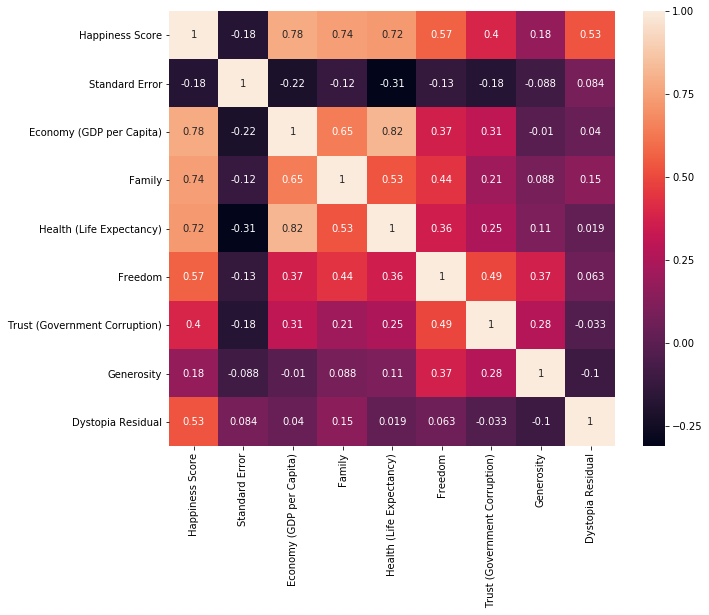

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(), annot=True)
plt.show()

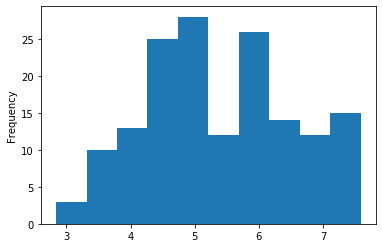

In [11]:
data1['Happiness Score'].plot(kind='hist')

In [12]:
data1.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [13]:
data1.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [14]:
data1.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
from sklearn.preprocessing import normalize

In [16]:
data1=normalize(data1)
data1=pd.DataFrame(data1)
data1

,0,1,2,3,4,5,6,7,8
0,0.911613,0.004098,0.167797,0.162150,0.113117,0.079971,0.050438,0.035659,0.302475
1,0.906056,0.005853,0.156061,0.168033,0.113582,0.075347,0.016950,0.052283,0.323789
2,0.912701,0.004035,0.160724,0.164980,0.106056,0.078742,0.058636,0.041396,0.302177
3,0.911871,0.004704,0.176870,0.161347,0.107311,0.081189,0.044252,0.042065,0.298862
4,0.912678,0.004366,0.162983,0.162531,0.111290,0.077783,0.040500,0.056296,0.301288
5,0.907893,0.003849,0.158170,0.161604,0.108995,0.078664,0.050717,0.028626,0.321127
6,0.912146,0.003460,0.164359,0.158268,0.110382,0.076127,0.039332,0.058860,0.304836
7,0.914265,0.003920,0.165336,0.160042,0.113087,0.081916,0.054434,0.045020,0.294391
8,0.916771,0.004242,0.157306,0.166049,0.114297,0.080451,0.054007,0.059769,0.284903
9,0.915547,0.005132,0.167621,0.164561,0.117090,0.081856,0.044793,0.054754,0.284878


In [17]:
y = data1[0]
x = data1.drop(0,axis=1)

In [18]:
x

,1,2,3,4,5,6,7,8
0,0.004098,0.167797,0.162150,0.113117,0.079971,0.050438,0.035659,0.302475
1,0.005853,0.156061,0.168033,0.113582,0.075347,0.016950,0.052283,0.323789
2,0.004035,0.160724,0.164980,0.106056,0.078742,0.058636,0.041396,0.302177
3,0.004704,0.176870,0.161347,0.107311,0.081189,0.044252,0.042065,0.298862
4,0.004366,0.162983,0.162531,0.111290,0.077783,0.040500,0.056296,0.301288
5,0.003849,0.158170,0.161604,0.108995,0.078664,0.050717,0.028626,0.321127
6,0.003460,0.164359,0.158268,0.110382,0.076127,0.039332,0.058860,0.304836
7,0.003920,0.165336,0.160042,0.113087,0.081916,0.054434,0.045020,0.294391
8,0.004242,0.157306,0.166049,0.114297,0.080451,0.054007,0.059769,0.284903
9,0.005132,0.167621,0.164561,0.117090,0.081856,0.044793,0.054754,0.284878


In [19]:
y

0      0.911613
1      0.906056
2      0.912701
3      0.911871
4      0.912678
5      0.907893
6      0.912146
7      0.914265
8      0.916771
9      0.915547
10     0.891555
11     0.889621
12     0.906712
13     0.874977
14     0.906242
15     0.882210
16     0.915964
17     0.917577
18     0.906476
19     0.911936
20     0.918891
21     0.905749
22     0.879522
23     0.918243
24     0.893124
25     0.911901
26     0.897732
27     0.920523
28     0.906592
29     0.888275
         ...   
128    0.913382
129    0.904744
130    0.828613
131    0.923378
132    0.882827
133    0.908683
134    0.895969
135    0.881606
136    0.870977
137    0.881028
138    0.893288
139    0.875306
140    0.896318
141    0.900549
142    0.907536
143    0.875342
144    0.922518
145    0.899539
146    0.873117
147    0.797765
148    0.863523
149    0.864669
150    0.899883
151    0.893957
152    0.865137
153    0.926231
154    0.879915
155    0.922590
156    0.835374
157    0.862404
Name: 0, Length: 158, dt

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)

# Linear Regression

In [21]:
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(f"Regression R2:{model.score(x_test,y_test)}")

Regression R2:0.9999930048998011


In [23]:
print(f"Regression R2:{model.score(x_train,y_train)}")

Regression R2:0.9999949152137064


# Regularization

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.metrics import r2_score

Lasso

In [25]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [26]:
alpha = lasscv.alpha_
alpha

1.91177525459556e-06

In [27]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.91177525459556e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
lasso_reg.score(x_test,y_test)

0.9943870100798354

Conclusion: Since our test and train accuracy is equal and high our model is genralized and performing good in linear regression.